Exploring your Data
----
Essentially, the previous chapters have really covered on the basics of experiments, but we've really not looked much into what to first do to your data when you initally gather it and want to test what it contains.

Exploring One-Dimensional Data
----
Sometimes your data is simply a singular dimension or variable, and needs to be analyzed with less scrutany than simply plotting. One method to analyze the a rough outline of the data is to bucketize the variable into discrete ranges of values, such that the ranges could be analyzed and compared.

In [18]:
# Imports and necessary definitions from previous chapters
import random                   # random.random()
import math                     # math.erf
from collections import Counter # Counter
import matplotlib.pyplot as plt # Plotting
import numpy as np

# Definitions
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
            
    low_z, low_p = -10.0, 0
    hi_z,  hi_p  =  10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
                        
    return mid_z

In [1]:
def bucketize(point, bucket_size):
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size*math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

For example, consider these data:
---

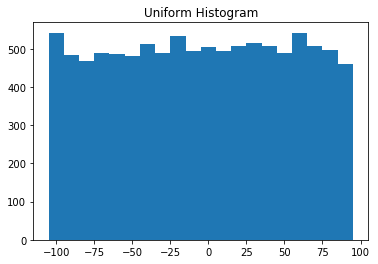

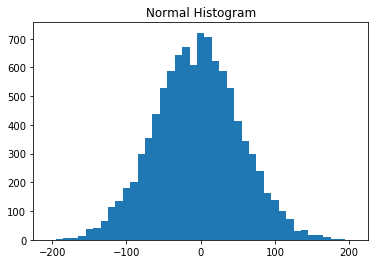

In [13]:
# Seed the random function to allow reproducible results
random.seed(0)

# Uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# Normal distribution with mean 0, std dev 57
normal  = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

# Plot Uniform
plot_histogram(uniform, 10, "Uniform Histogram")

# Plot Normal
plot_histogram(normal, 10, "Normal Histogram")

Continuing to explore Two Dimensional Data
---

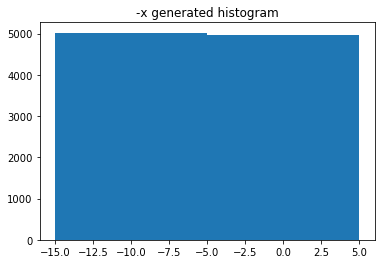

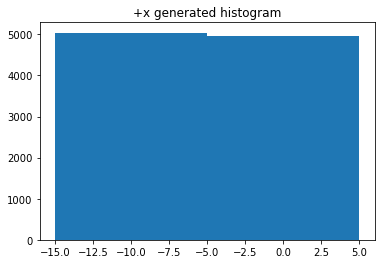

ys1 mean: -0.00143072986603
ys2 mean: -0.00866318511963
ys1 s.d.: 1.1260013114
ys2 s.d.: 1.12547961175


In [26]:
def random_normal():
    """returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

# Create two dummy datasets of random normal variables
# Notice, ys1 and ys2 have similar outputs, though -x and x
xs  = [random_normal() for _ in range(10000)]
ys1 = [-x + random_normal() / 2 for x in xs]
ys2 = [x + random_normal() / 2 for x in xs]

# Notice the near exact similarity
plot_histogram(ys1, 10, "-x generated histogram")
plot_histogram(ys2, 10, "+x generated histogram")
print("ys1 mean: " + str(np.mean(ys1)))
print("ys2 mean: " + str(np.mean(ys2)))
print("ys1 s.d.: " + str(np.std(ys1)))
print("ys2 s.d.: " + str(np.std(ys2)))